In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('EPL_20_21.csv')

In [3]:
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0


# Data Cleaning and pre-processing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


In [9]:
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [14]:
df['MinsPerMatch'] = (df['Mins']/df['Matches']).astype(float)
df['GoalsPerMatch']= (df['Goals']/df['Matches']).astype(float)
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80.277778,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88.548387,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74.342857,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84.666667,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74.156250,0.031250


# Exploratory Data Analysis

In [16]:
#total Goals 
total_goals = df['Goals'].sum()
total_goals

986

In [22]:
# penalty goals
total_penalties_scored = df['Penalty_Goals'].sum()
total_penalties_scored

102

In [23]:
# goals without penaltie
total_goals - total_penalties_scored

884

In [28]:
# Total penalties Attemps
Total_Penalty_Attempted = df['Penalty_Attempted'].sum()
Total_Penalty_Attempted

125

In [29]:
# Total Panalty Miss

Total_Penalty_Missed = Total_Panalty_Attempted - total_penalties_scored
Total_Penalty_Missed

23

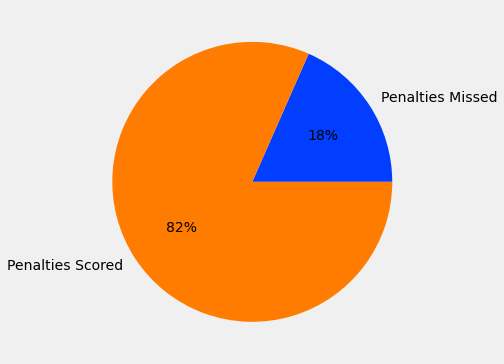

In [33]:
# Pie chart of Penalty Missed Vs Scored
plt.style.use("fivethirtyeight")
plt.figure(figsize=(13,6))
data = [Total_Penalty_Missed,total_penalties_scored]
labels = ['Penalties Missed','Penalties Scored']
colors = sns.color_palette('bright')[0:2]
plt.pie(data,labels = labels,colors = colors,autopct = '%.0f%%')
plt.show()

In [34]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

<AxesSubplot:title={'center':'Total Players with position Groups'}, ylabel='Position'>

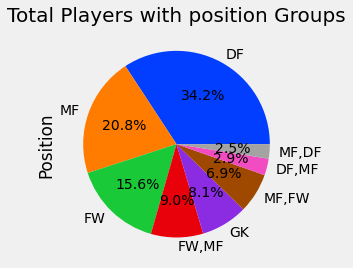

In [35]:
colors = sns.color_palette("bright")

plt.title('Total Players with position Groups', fontsize = 20)
df['Position'].value_counts().head(8).plot(kind = 'pie',colors = colors,autopct="%.1f%%")

In [36]:
df[df['Position']=='FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74.342857,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47.272727,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44.000000,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60.000000,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81.806452,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50.760000,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57.565217,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41.777778,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45.937500,0.187500


In [37]:
np.size((df['Nationality'].unique()))

59

<AxesSubplot:xlabel='Nationality'>

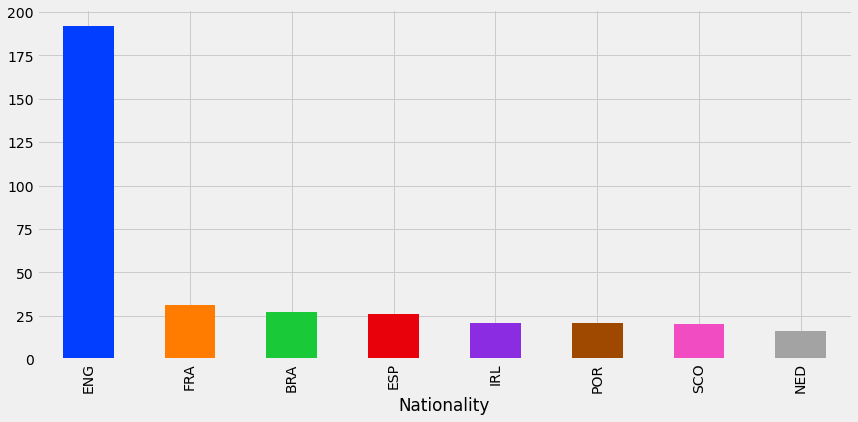

In [40]:
nationality = df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(8).plot(kind = 'bar',figsize =(13,6),color = sns.color_palette("bright"))

<AxesSubplot:>

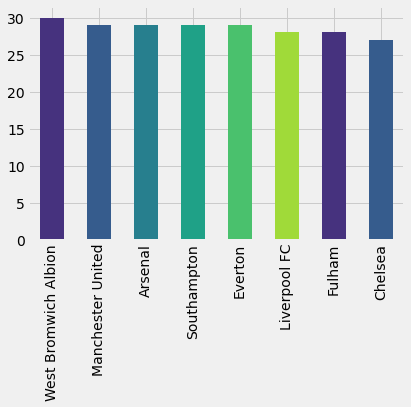

In [43]:
df['Club'].value_counts().nlargest(8).plot(kind='bar', color = sns.color_palette('viridis'))

In [44]:
Age_under_20 = df[df['Age']<=20]
Age_20_25 = df[(df['Age']>20) & (df['Age']<=25)]
Age_25_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
Age_above_30 = df[df['Age'] > 30]

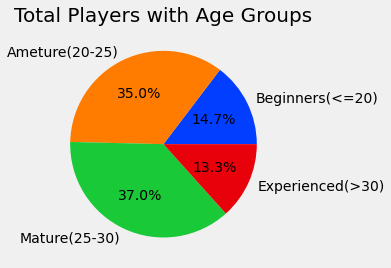

In [46]:
# Total Players categorised in age groups 
age_data = [Age_under_20['Name'].count(),Age_20_25['Name'].count(),Age_25_30['Name'].count(),Age_above_30['Name'].count()]
labels = ["Beginners(<=20)","Ameture(20-25)","Mature(25-30)","Experienced(>30)"]
color = sns.color_palette ("bright")
plt.title('Total Players with Age Groups', fontsize = 20)
plt.pie(age_data, labels = labels,colors = colors,autopct="%.1f%%")
plt.show()

In [47]:
# the oldest player in epl
df[df['Age'] == df['Age'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0,90.0,0.0


In [48]:
# the youngest player in epl
df[df['Age'] == df['Age'].min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.0,0,0,5.5,0.0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0,1.0,0.0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,8,62.5,0,0,0.29,0.0,0,0,10.0,0.0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0,11.0,0.0


<AxesSubplot:>

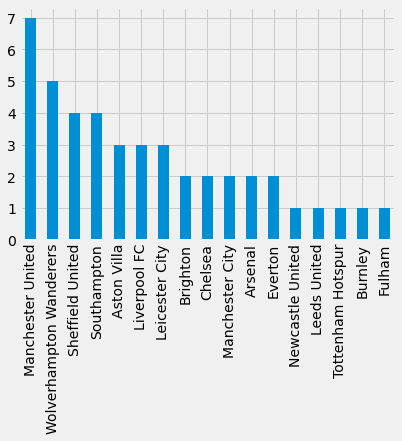

In [50]:
# total players in each clubs below 20
players_below_20 = df[df['Age']<20]
players_below_20['Club'].value_counts().plot(kind='bar')

<AxesSubplot:>

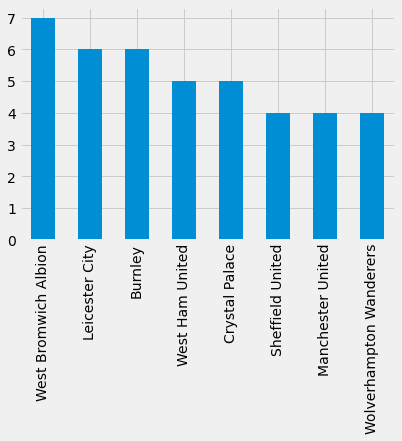

In [51]:
# total player in each club over 20
players_above_30 = df[df['Age'] > 30]
players_above_30['Club'].value_counts().head(8).plot(kind = 'bar') 

<AxesSubplot:ylabel='Position'>

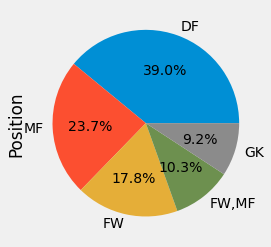

In [52]:
x = df['Position'].value_counts().head(5)
x.plot(kind = 'pie',autopct="%.1f%%")

In [53]:
# total goals,assists and yellow cards for every position
pd.pivot_table(df[['Goals' , 'Assists','Yellow_Cards']] , index = df['Position'] ,aggfunc = 'sum')

,Assists,Goals,Yellow_Cards
Position,,,
DF,136,129,443
"DF,FW",8,3,9
"DF,MF",12,11,36
FW,172,442,100
"FW,DF",8,8,2
"FW,MF",99,124,72
GK,2,1,31
MF,162,171,339
"MF,DF",18,14,42


In [54]:
# total goals,assists and yellow cards for every club
pd.pivot_table(df[['Goals' , 'Assists','Yellow_Cards']] , index = df['Club'] ,aggfunc = 'sum')

,Assists,Goals,Yellow_Cards
Club,,,
Arsenal,38,53,49
Aston Villa,38,52,71
Brighton,24,39,49
Burnley,20,32,48
Chelsea,38,56,51
Crystal Palace,29,39,56
Everton,32,45,59
Fulham,18,26,67
Leeds United,45,60,61


<AxesSubplot:ylabel='Club'>

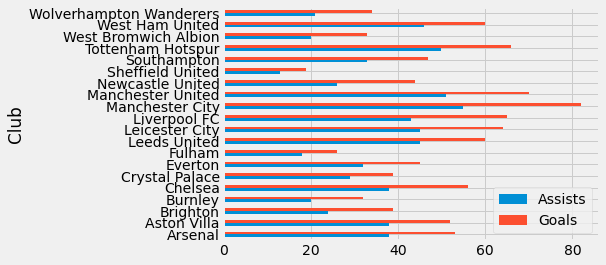

In [56]:
pd.pivot_table(df[['Goals' , 'Assists']] , index = df['Club'] ,aggfunc = 'sum').plot(kind = 'barh')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

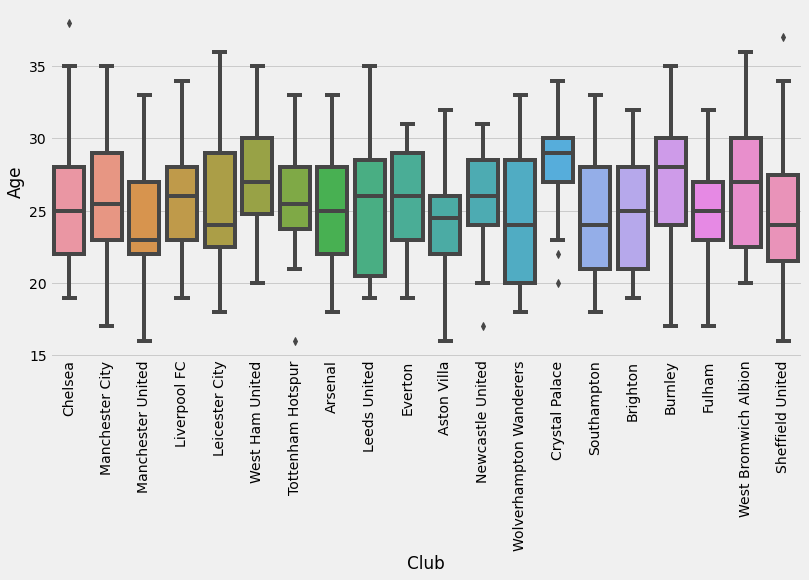

In [57]:
# average age for each club
plt.figure(figsize=(12,6))
sns.boxplot(x='Club',y='Age',data = df)
plt.xticks(rotation=90)

crystal palace has the highest average 

In [58]:
# Most avarage age of the team
num_player = df.groupby('Club').size()
data = (df.groupby('Club')['Age'].sum())/ num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

In [59]:
 # Total assists from each club
Assist_by_club = pd.DataFrame(df.groupby('Club',as_index=False)['Assists'].sum())
Assist_by_club

,Club,Assists
0,Arsenal,38
1,Aston Villa,38
2,Brighton,24
3,Burnley,20
4,Chelsea,38
5,Crystal Palace,29
6,Everton,32
7,Fulham,18
8,Leeds United,45
9,Leicester City,45


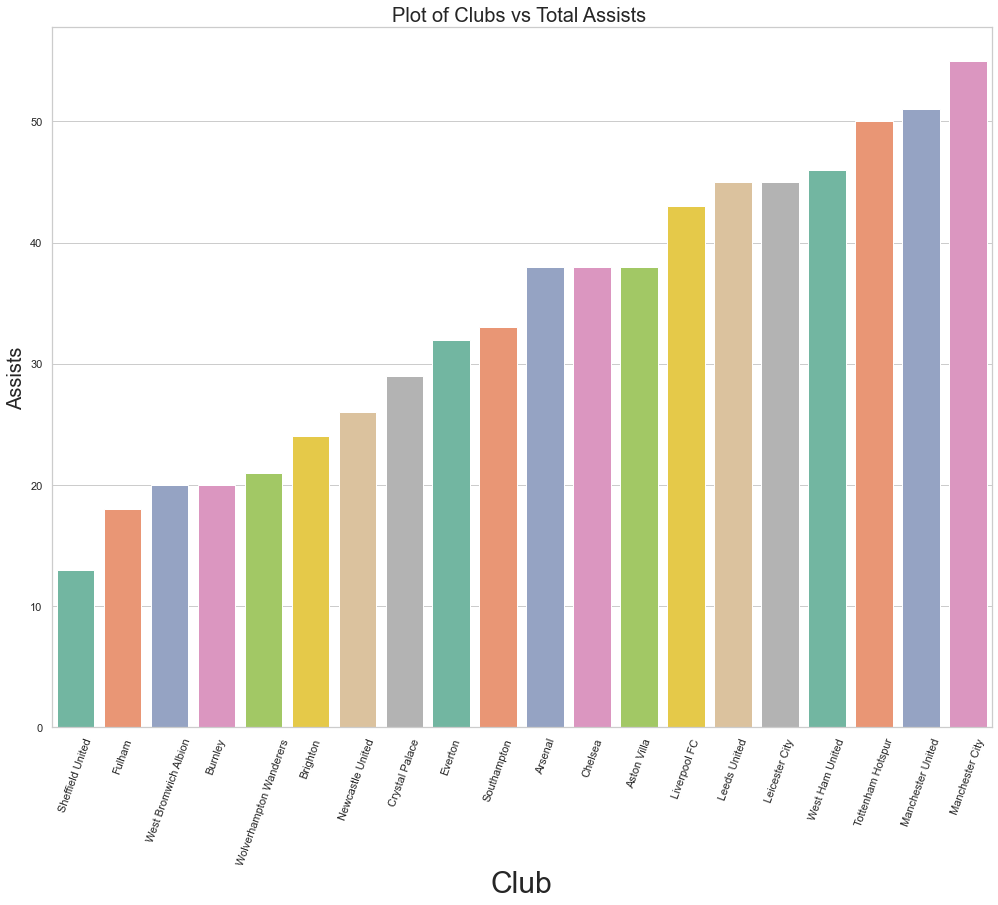

In [65]:
# most clubs making assists
Assists_by_clubs = pd.DataFrame(df.groupby('Club', as_index=False)["Assists"].sum())
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data=Assists_by_clubs.sort_values(by="Assists") , palette="Set2")
ax.set_xlabel("Club", fontsize=30)
ax.set_ylabel("Assists", fontsize=20)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (15,10)
plt.title("Plot of Clubs vs Total Assists ", fontsize=20)
plt.show()

In [66]:
# most player mekes assists
df[df['Assists'] == df['Assists'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.6,0.22,1,0,88.057143,0.657143


In [67]:
# top 10 players making assists
top_10_assists = df[['Name' , 'Club', 'Assists','Matches']].nlargest(n=10,columns = 'Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


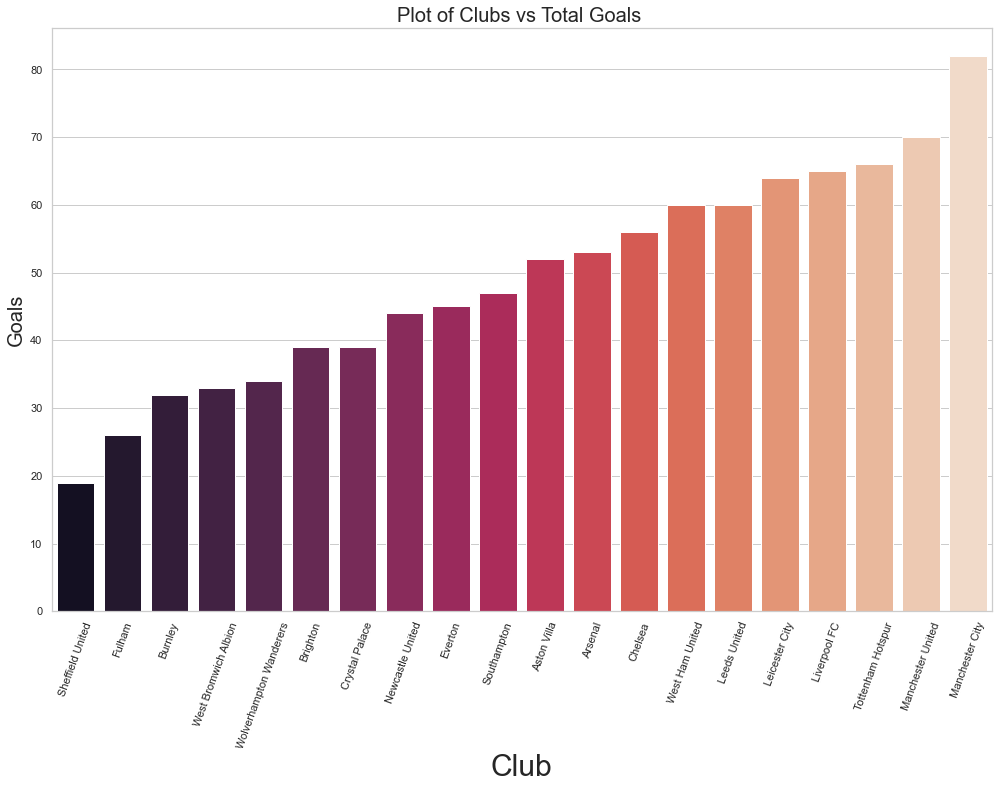

In [68]:
# most clubs scored goals
Goals_by_clubs = pd.DataFrame(df.groupby('Club', as_index=False)["Goals"].sum())
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Goals', data=Goals_by_clubs.sort_values(by="Goals") , palette="rocket")
ax.set_xlabel("Club", fontsize=30)
ax.set_ylabel("Goals", fontsize=20)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Plot of Clubs vs Total Goals ", fontsize=20)
plt.show()

In [69]:
#  top 10 players scored goals
top_10_goals = df[['Name' , 'Club', 'Goals','Matches']].nlargest(n=10,columns = 'Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [71]:
df['Goals_Per_Match']=df['Goals']/df['Matches']
top_10_goals_per_match = df[['Name' ,'Goals','Goals_Per_Match']].nlargest(n=10,columns = 'Goals_Per_Match')
top_10_goals_per_match

,Name,Goals,Goals_Per_Match
162,Harry Kane,23,0.657143
81,Mohamed Salah,22,0.594595
307,Joe Willock,8,0.571429
145,Jesse Lingard,9,0.562500
175,Gareth Bale,11,0.550000
74,Anthony Elanga,1,0.500000
51,Bruno Fernandes,18,0.486486
237,Dominic Calvert-Lewin,16,0.484848
120,Kelechi Iheanacho,12,0.480000
92,Diogo Jota,9,0.473684


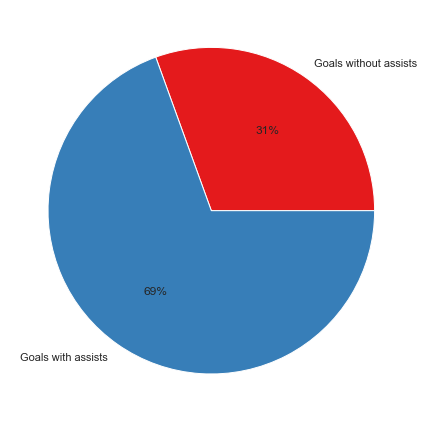

In [72]:
# Pie Chart - Goals with assist and without assists
plt.figure(figsize=(14,7))
Total_Goals = df['Goals'].sum()
assists = df["Assists"].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assists', "Goals with assists"]
color = sns.color_palette("Set1")
plt.pie(data, labels = labels, colors=color, autopct="%.0f%%")
plt.show()

In [73]:
# total cards for each club
df['Total_Cards'] = df['Yellow_Cards']+df['Red_Cards']
team_cards=df.groupby(by='Club', as_index=False)['Total_Cards'].sum().sort_values(by='Total_Cards',ascending=False)
team_cards

,Club,Total_Cards
14,Sheffield United,76
1,Aston Villa,75
7,Fulham,70
13,Newcastle United,68
12,Manchester United,65
8,Leeds United,62
6,Everton,61
9,Leicester City,61
16,Tottenham Hotspur,59
5,Crystal Palace,58


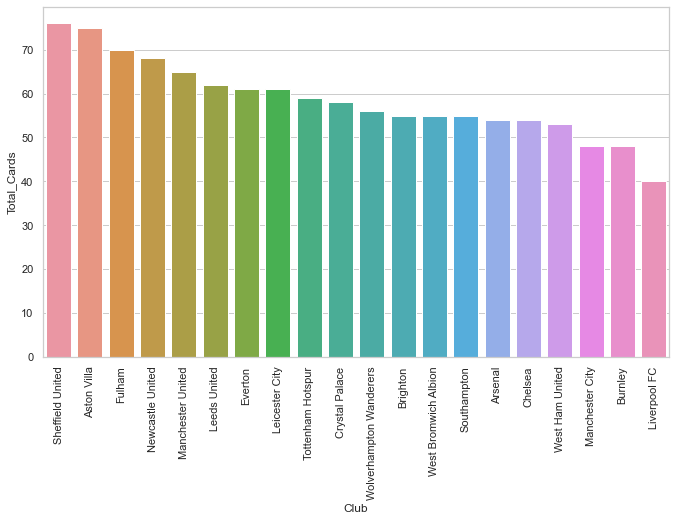

In [74]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Club', y='Total_Cards', data=team_cards)
plt.xticks(rotation=90)
plt.show()

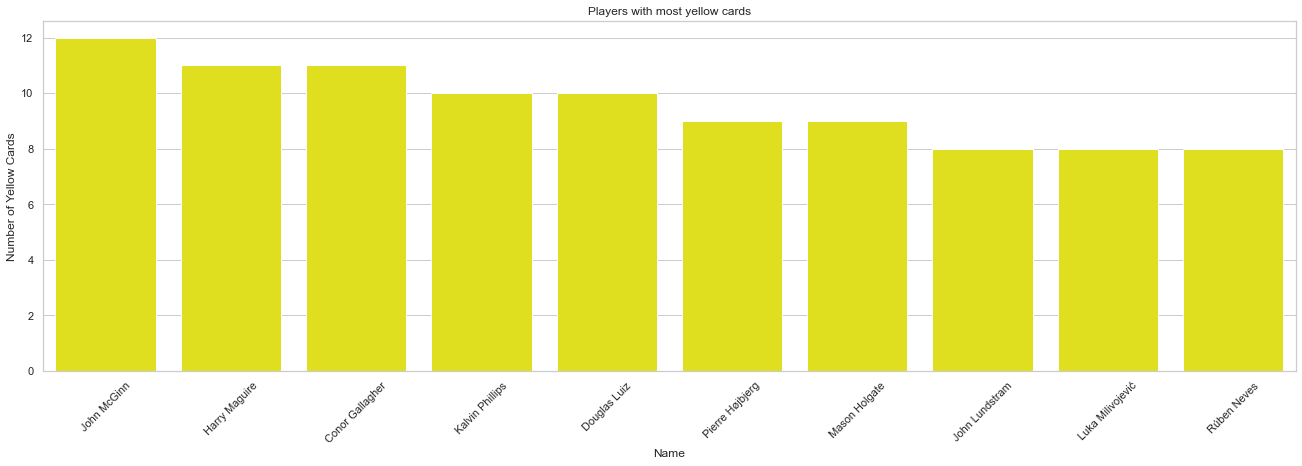

In [79]:
# Top 10 players with most yellow cards

yellow_card = df.sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with most yellow cards')
c = sns.barplot(x=yellow_card['Name'], y=yellow_card['Yellow_Cards'], label="Players", color='yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.show()

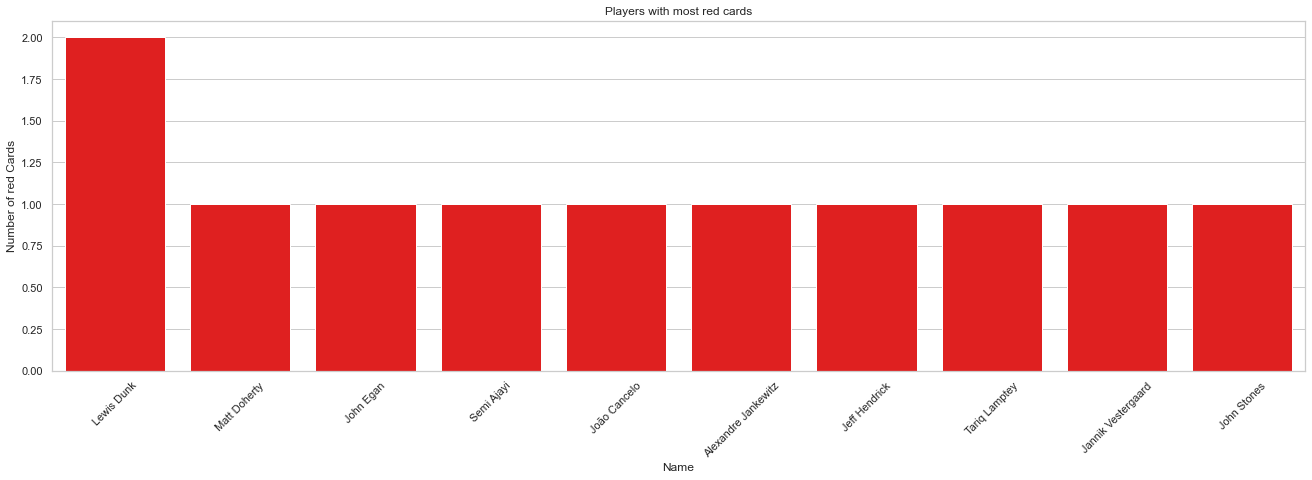

In [80]:
# Top 10 players with most red cards

red_card = df.sort_values(by='Red_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with most red cards')
c = sns.barplot(x=red_card['Name'], y=red_card['Red_Cards'], label="Players", color='red')
plt.ylabel('Number of red Cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.show()

In [81]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch,Goals_Per_Match,Total_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,1,1,0.21,0.24,2,0,80.277778,0.166667,0.166667,2
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,0,0,0.00,0.00,2,0,88.548387,0.000000,0.000000,2
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,0,0,0.41,0.21,2,0,74.342857,0.171429,0.171429,2
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,0,0,0.10,0.11,3,0,84.666667,0.111111,0.111111,3
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,0,0,0.06,0.12,3,0,74.156250,0.031250,0.031250,3


In [82]:
df.corr()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch,Goals_Per_Match,Total_Cards
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.120244,0.122812,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414,0.258514,0.025032,0.025032,0.118979
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.785362,0.085462,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281,0.545134,0.316723,0.316723,0.577204
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.853448,0.086039,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383,0.696719,0.279281,0.279281,0.605020
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.855600,0.085460,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038,0.688737,0.272124,0.272124,0.605823
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.201526,-0.025137,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785,0.201500,0.917432,0.917432,0.107659
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.393906,-0.016645,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855,0.244386,0.499182,0.499182,0.203032
Passes_Attempted,0.120244,0.785362,0.853448,0.855600,0.201526,0.393906,1.000000,0.228393,0.149533,0.157020,-0.092535,0.105132,0.634567,0.208003,0.620534,0.099542,0.099542,0.636487
Perc_Passes_Completed,0.122812,0.085462,0.086039,0.085460,-0.025137,-0.016645,0.228393,1.000000,-0.024517,-0.014934,-0.035313,0.047720,0.162451,0.054068,0.174502,-0.019574,-0.019574,0.163045
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,0.149533,-0.024517,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109,0.105595,0.497733,0.497733,0.058288
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.157020,-0.014934,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073,0.110031,0.508103,0.508103,0.064974


[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Matches'),
 Text(2.5, 0, 'Starts'),
 Text(3.5, 0, 'Mins'),
 Text(4.5, 0, 'Goals'),
 Text(5.5, 0, 'Assists'),
 Text(6.5, 0, 'Passes_Attempted'),
 Text(7.5, 0, 'Perc_Passes_Completed'),
 Text(8.5, 0, 'Penalty_Goals'),
 Text(9.5, 0, 'Penalty_Attempted'),
 Text(10.5, 0, 'xG'),
 Text(11.5, 0, 'xA'),
 Text(12.5, 0, 'Yellow_Cards'),
 Text(13.5, 0, 'Red_Cards'),
 Text(14.5, 0, 'MinsPerMatch'),
 Text(15.5, 0, 'GoalsPerMatch'),
 Text(16.5, 0, 'Goals_Per_Match'),
 Text(17.5, 0, 'Total_Cards')]

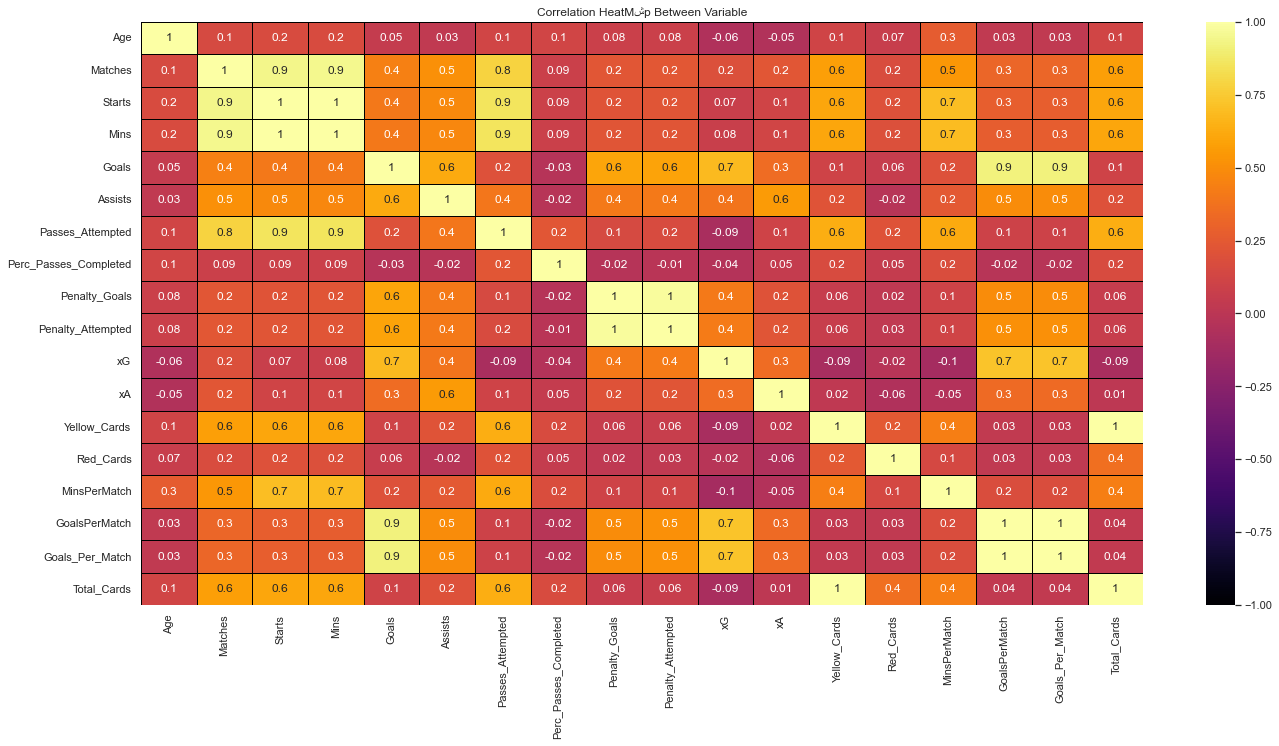

In [83]:
corr_df = df.corr(method = 'pearson')
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_df,annot=True,fmt='.1g',vmin= -1 ,vmax = 1, center = 0, cmap = 'inferno',linewidths=1,linecolor='Black')
heatmap.set_title('Correlation HeatMشp Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

In [84]:
df['Matches'].value_counts().sort_values(ascending = False).head()

1     41
2     24
36    22
30    21
33    19
Name: Matches, dtype: int64